In [2]:
library('igraph')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [3]:
g <- read_graph('../output/stock_edgelist.txt', format='ncol', directed=FALSE)

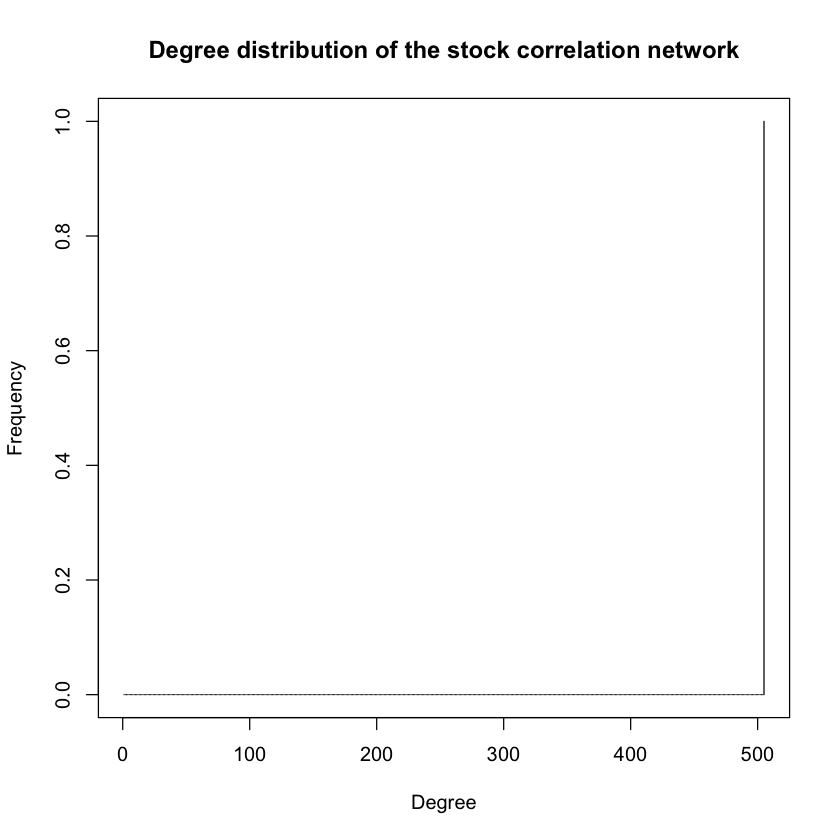

In [4]:
plot(degree.distribution(g),main="Degree distribution of the stock correlation network",xlab="Degree",ylab="Frequency", type="h")


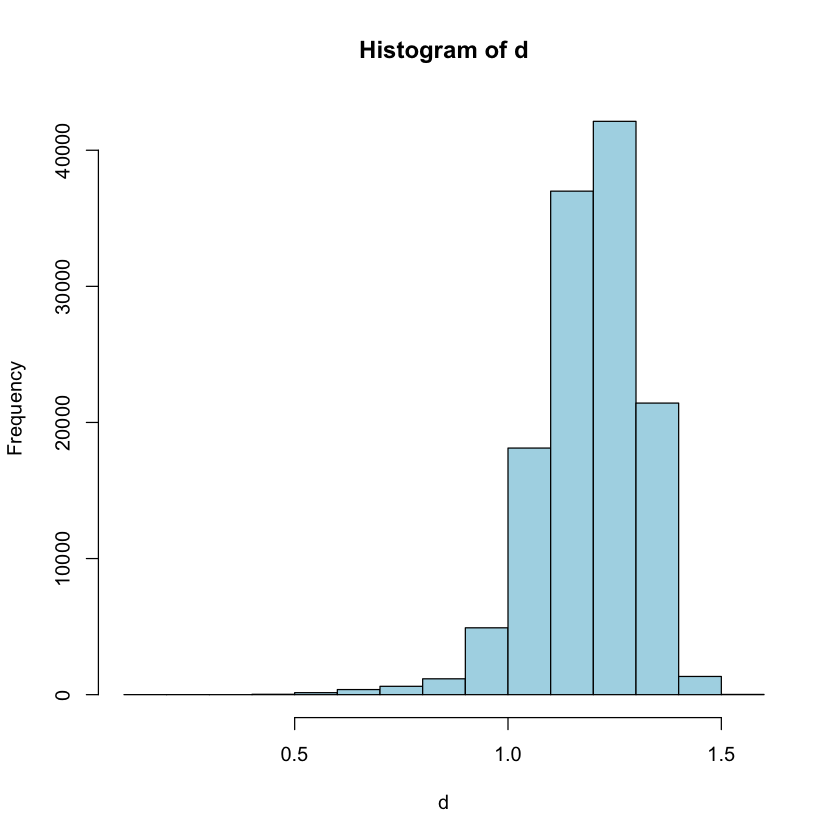

In [13]:
hist(E(g)$weight, main = "Histogram of d", xlab = "d", col="light blue")

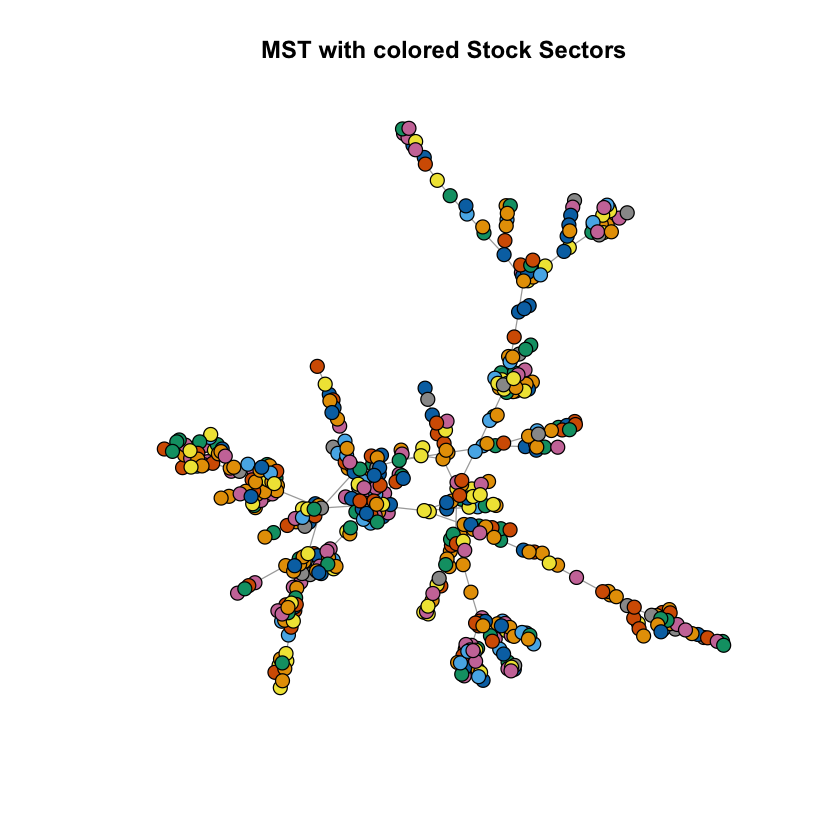

In [12]:
minst = mst(g, weights = E(g)$weight)
all_sectors = read.csv("../data/Name_sector.csv")
symbol_to_sector = list()
for (index in 1:length(all_sectors$Symbol)) {
  symbol_to_sector[[all_sectors$Symbol[index]]] = all_sectors$Sector[index]
}
unique_sectors = unique(read.csv("../data/Name_sector.csv")$Sector)
color_per_sector = list()
i = 1
for (sector in unique_sectors) {
  color_per_sector[[sector]] = i
  i = i + 1
}

V(g)$symbol = all_sectors$Symbol
V(minst)$symbol = all_sectors$Symbol
V(minst)$color = unlist(lapply(V(minst)$symbol, function(x) {color_per_sector[[symbol_to_sector[[x]]]]}))

plot(minst, vertex.size = 5, edge.arrow.size=0, vertex.color = V(minst)$color, vertex.label=NA, main='MST with colored Stock Sectors')